# **TASK 4: Location-Based Analysis**

## **1. Introduction**

* The restaurant industry is highly influenced by geographical factors such as city size, locality, population density, and regional food preferences. Understanding the spatial distribution of restaurants helps identify market concentration, pricing patterns, and customer preferences across locations.

* This project performs a location-based analysis of restaurants using latitude, longitude, city, locality, ratings, pricing, and cuisine data. Python libraries such as Pandas, Matplotlib, Seaborn, and Folium are used to analyze and visualize spatial patterns in the dataset.

In [63]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### **2. Dataset Description**

**Key Attributes Used:**

* Restaurant ID
* City
* Locality
* Latitude
* Longitude
* Cuisines
* Aggregate Rating
* Average Cost for Two

Before analysis, records with missing Latitude, Longitude, or City values were removed to ensure accurate geographical analysis.

In [64]:
# Load Dataset
res_data = pd.read_csv("/content/Dataset.csv")

In [65]:
# View the data
res_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [66]:
res_data.shape

(9551, 21)

In [67]:
res_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [68]:
# Check missing values or Null values
res_data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


### **3. Geographical Distribution of Restaurants**
**Latitude and Longitude Scatter Plot**

A scatter plot was created using latitude and longitude values to visualize restaurant locations.

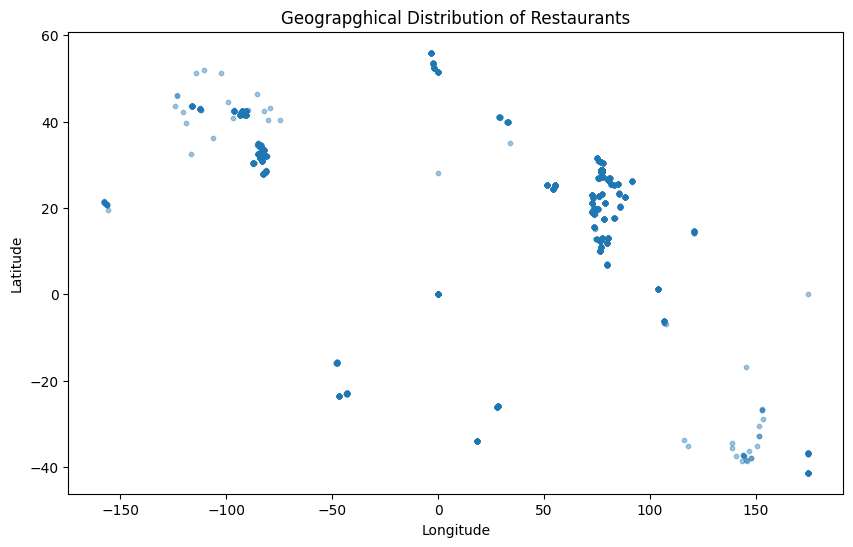

In [69]:
# Geograpghical distribution of Restaurants
# Explore Latitude and Longitude
res_data = res_data.dropna(subset=["Latitude","Longitude","City"])

# Visualize Restaurant locations using Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(res_data["Longitude"], res_data["Latitude"], alpha=0.4, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geograpghical Distribution of Restaurants")
plt.show()

**Observation:**

* Restaurants are not evenly distributed.
* Dense clusters indicate urban and metropolitan areas.
* Sparse distribution represents rural or less populated regions.
* This confirms that restaurant businesses are heavily concentrated in cities with higher population density.


### **4. Map-Based Visualization**

An interactive Folium map was created by plotting restaurant locations using circular markers.

In [ ]:
# Map based visualization
# Visualize Restaurant distribution using map

# Center the map at mean Latitude & Longitude
map=[res_data["Latitude"].mean(), res_data["Longitude"].mean()]
restaurant_map = folium.Map(location=map, zoom_start=5)

# Restaurant points to add
for _,row in res_data.iterrows():
  folium.CircleMarker(location= [row["Latitude"], row["Longitude"]], radius=2, color="blue", fill=True, fill_opacity=0.6).add_to(restaurant_map)

# Map Visualize
restaurant_map

**Key Findings:**

* Clear clustering of restaurants in major cities.
* Urban centers show high restaurant density.
* The visualization helps identify hotspots for food businesses.
* This map-based approach provides an intuitive understanding of spatial concentration patterns.

### **6. Restaurant Concentration by City**
* Restaurants were grouped by City and counted.

In [ ]:
# Restaurant Concentration by City

# Identify cities with highets numbers of restaurants
city_count = res_data.groupby("City")["Restaurant ID"].count().sort_values(ascending=False)

# Display top 10 cities
print(city_count.head(10))
print("\n")

# Visualize top 10 cities by number of restaurant
plt.figure(figsize=(10,5))
city_count.head(10).plot(kind="bar", color="teal")
plt.title("Highest Number of Restaurants in top 10 Cities")
plt.xlabel("City Name")
plt.ylabel("No.of Restaurants")
plt.xticks(rotation=45)
plt.show()

**Findings:**

* A small number of cities account for a large proportion of restaurants.
* Metropolitan cities dominate the top positions.
* Indicates higher competition and demand in major cities.
* A bar chart visualization highlights the top cities with the highest number of restaurants.

### **7. Restaurant Concentration by Locality**

* Locality-level analysis was performed to identify high-density restaurant areas.

In [ ]:
# Restaurant Concentation by locality
# Find localities with high number of restaurants
locality_count = (res_data.groupby("Locality")["Restaurant ID"]).count().sort_values(ascending=False)

# Print top 10 cities
print(locality_count.head(10))

**Insights:**

* Certain localities within cities have significantly higher restaurant counts.
* Popular commercial and residential hubs attract more food outlets.
* Locality analysis provides more granular insight than city-level analysis.

### **8. Average Restaurant Rating by City**
* The average aggregate rating was calculated for each city.

In [ ]:
# Average Restaurant rating by city
# Compare retaurant quality across different cities
avg_rating_by_city = (res_data.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False))

# Display average rating by city
print(avg_rating_by_city.head(10))
print("\n")

# Visualize average rating by city
plt.figure(figsize=(10,5))
avg_rating_by_city.head(10).plot(kind="bar", color="green")
plt.title("Average Restuarant Rating by Top 10 Cities")
plt.xlabel("City Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

**Key Observations:**

* Cities with fewer restaurants sometimes have higher average ratings.
* High competition cities do not always guarantee better quality.
* Restaurant quality varies significantly across locations.

A bar chart displays the top cities based on average restaurant ratings.

### **9. Average Cost for Two by City**

* The average cost for two people was calculated city-wise.

In [ ]:
# Average cost for Two by City
# Analyze pricing differnece across different cities
avg_cost = (res_data.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False))

# Print top 10 cities average coset
print(avg_cost.head(10))

**Findings:**

* Premium and metropolitan cities have higher dining costs.
* Smaller cities tend to offer more budget-friendly options.
* Pricing reflects income levels, demand, and restaurant positioning.

### **10. Cuisine Analysis by City**
* The Cuisines column was split to handle multiple cuisines per restaurant.

In [ ]:
# Cuisine Analysis by City
# Find most popular cuisines across different cities
popular_cuisine = res_data.copy()

# Split multiple Cuisines into seperate rows
popular_cuisine["Cuisines"] = popular_cuisine["Cuisines"].str.split(", ")
popular_cuisine = popular_cuisine.explode("Cuisines")

# Count cuisines by city
top_cuisines_city = popular_cuisine.groupby(["City", "Cuisines"]).size().reset_index(name="Count").sort_values(["City", "Count"], ascending=[True,False])
# Print top Cuisines by city
print(top_cuisines_city.head(10))

**Insights:**

* Cuisine preferences vary widely across cities.
* Regional cuisines dominate their respective locations.
* Metropolitan cities show greater diversity in cuisine options.
* This analysis highlights cultural and regional influences on food preferences.

In [ ]:
# Location-based insights
# Summarize patterns observed from geographical analysis

print("\nLocation-Based Insights:\n")
print("1. Restaurants are highly concentrated in metropolitan cities.")
print("2. Certain cities have fewer restaurants but higher average ratings.")
print("3. Average cost for two is generally higher in urban and premium locations.")
print("4. Cuisine preferences vary significantly across cities, reflecting regional tastes.")
print("5. Map visualization shows clear restaurant clusters in popular localities.")


### **Conclusion**

This project successfully demonstrates how geographical data can be used to analyze restaurant distribution, quality, pricing, and cuisine preferences. The combination of statistical analysis and map-based visualization provides valuable insights for business decision-making, market analysis, and urban planning.